<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/Talleres/taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Procesamiento de Imagenes y Video.</strong></h1>
<h2> Para: Ing. Carlos Alberto Parra Rodriguez., M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Leonardo García.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

La visión por computadora es una disciplina que permite a las máquinas interpretar y comprender el contenido visual del mundo que les rodea. Uno de los aspectos cruciales de esta área es la calibración de cámaras, una técnica que busca mejorar la precisión con la que los dispositivos capturan y procesan imágenes y videos. Este proceso es esencial para corregir distorsiones ópticas, estimar la posición y orientación de las cámaras y reconstruir la geometría de las escenas observadas. En este contexto, el presente trabajo explora la calibración y corrección de perspectiva utilizando un patrón de ajedrez y la biblioteca OpenCV, un estándar de facto en el campo del procesamiento de imágenes y visión por computadora.

Mediante la captura de múltiples imágenes del patrón de ajedrez desde diferentes ángulos, se calcula la matriz de la cámara y los coeficientes de distorsión, los cuales son vitales para una amplia gama de aplicaciones, desde la realidad aumentada hasta la robótica y la reconstrucción tridimensional. Además, abordamos la corrección de perspectiva, un procedimiento crítico en la visión por computadora, que permite la representación plana y precisa de escenas tridimensionales.

Este estudio proporciona un enfoque práctico y detallado para la calibración de cámaras y la corrección de perspectiva, presentando una metodología replicable y los resultados obtenidos a través de experimentación con una cámara de resolución moderada. Los hallazgos destacan la eficacia del método empleado, demostrando su aplicabilidad en áreas tecnológicamente avanzadas y subrayando la importancia de una calibración precisa para el desarrollo de aplicaciones confiables en el campo de la visión por computadora.



In [ ]:
import os

# Obtener la ruta actual del directorio donde se está ejecutando el script
current_path = os.path.abspath(os.getcwd())
print(current_path)

# Importar las librerías necesarias para el procesamiento de imágenes y visualización
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Definir la ruta al directorio donde se almacenan las imágenes de calibración
directorio_imagenes = os.path.join(current_path, 'fotos/calibracion')

# Contar cuántas imágenes .jpg hay en el directorio de calibración
numero_de_imagenes = len([nombre for nombre in os.listdir(directorio_imagenes) if nombre.endswith('.jpg')])

# Crear una lista con las rutas completas de las imágenes de calibración
imagen_paths = [os.path.join(directorio_imagenes, f'{i}.jpg') for i in range(1, numero_de_imagenes + 1)]

# Seleccionar aleatoriamente 4 rutas de imágenes para su posterior uso
rutas_aleatorias = random.sample(imagen_paths, 4)


<p>
    <strong>Antes de proceder con la calibración de la cámara, es necesario preparar y organizar los datos que serán utilizados en el proceso.</strong> El siguiente bloque de código realiza varias tareas preliminares esenciales:
</p>

<ul>
    <li>
        <strong>Criterios de Terminación:</strong> Se establecen los criterios de terminación del algoritmo de optimización, los cuales son usados durante la refinación de las coordenadas de las esquinas del tablero de ajedrez.
    </li>
    <li>
        <strong>Puntos del Objeto:</strong> Se prepara un arreglo de puntos en 3D que representan las esquinas del tablero de ajedrez en el espacio del mundo real. Estos puntos se asumen fijos y conocidos, ya que el tablero de ajedrez es un objeto rígido.
    </li>
    <li>
        <strong>Almacenamiento de Puntos:</strong> Se inicializan dos listas para almacenar los puntos correspondientes en el mundo real (3D) y los puntos detectados en las imágenes (2D).
    </li>
</ul>

<p>
    Posteriormente, se carga un conjunto de imágenes de calibración y se detectan las esquinas del tablero de ajedrez utilizando las funciones proporcionadas por OpenCV. Los puntos detectados se refinan y se añaden a las listas de puntos del objeto y puntos de la imagen.
</p>

<p>
    Finalmente, se utiliza la función <code>calibrateCamera</code> de OpenCV para calcular la matriz de la cámara y los coeficientes de distorsión. Estos parámetros son cruciales para la corrección de imágenes y la estimación de la pose y la orientación de la cámara.
</p>


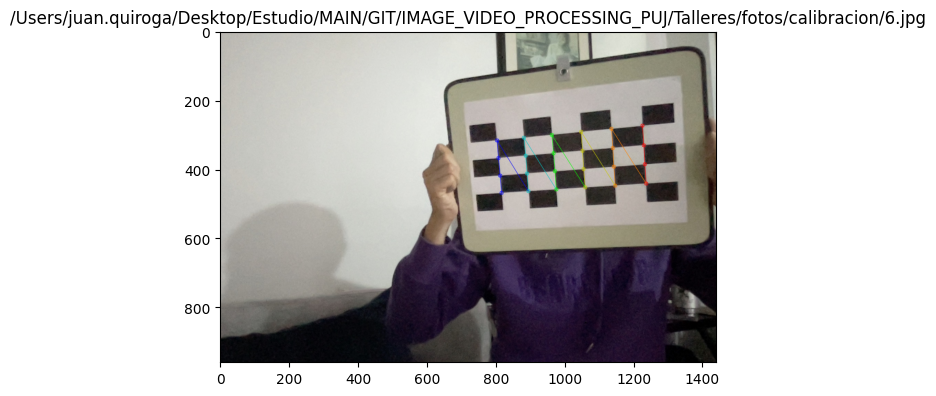

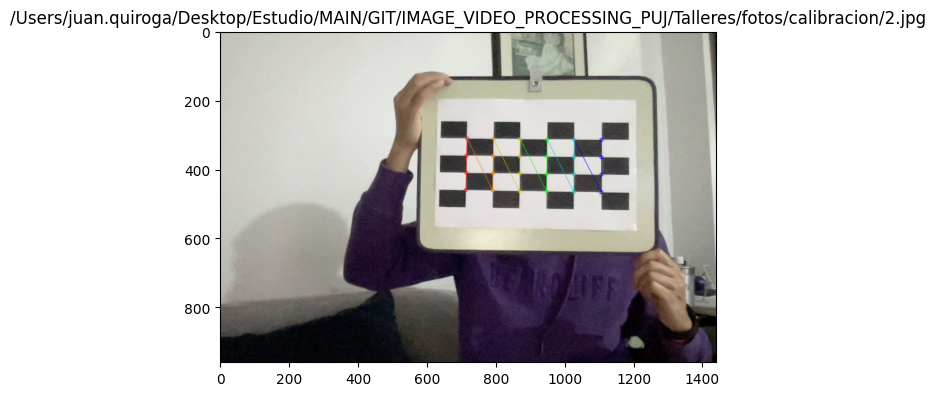

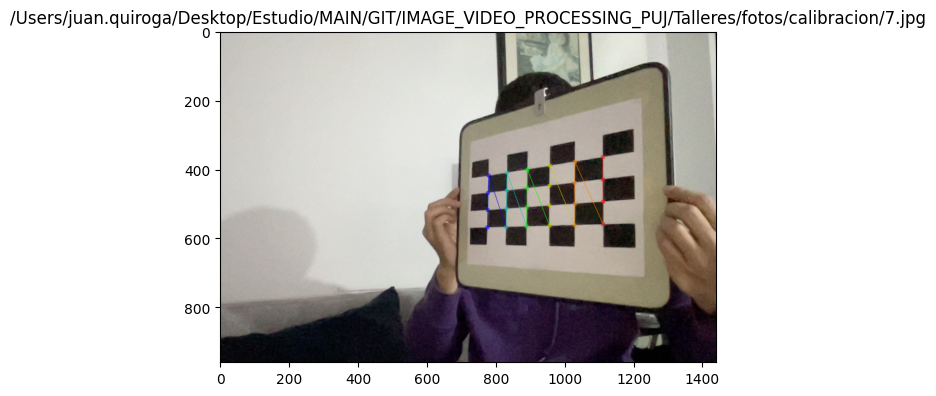

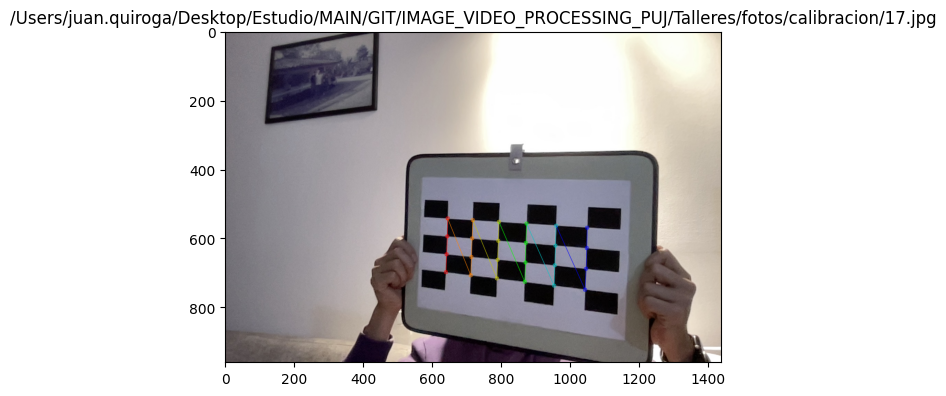

Matriz de la cámara (mtx):
[[1.60176396e+03 0.00000000e+00 5.39957395e+02]
 [0.00000000e+00 1.01906204e+03 4.60316631e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Coeficientes de distorsión (dist):
[[ 0.77856048 -0.98608761 -0.03496331 -0.10873377  0.184594  ]]


In [ ]:
import numpy as np
import cv2 as cv
import glob
import random
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((4*6,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

import os

# Ruta al directorio donde se encuentran las imágenes
directorio_imagenes = os.path.join(current_path, 'fotos/calibracion')

# Lista todos los archivos en el directorio y los filtra para contar solo los .jpg
numero_de_imagenes = len([nombre for nombre in os.listdir(directorio_imagenes) if nombre.endswith('.jpg')])

# Genera las rutas de las imágenes
images = [os.path.join(directorio_imagenes, f'{i}.jpg') for i in range(1, numero_de_imagenes + 1)]

# Selecciona 4 imágenes aleatoriamente
selected_images = random.sample(images, 4)

for fname in selected_images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (4,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw the corners on the image
        cv.drawChessboardCorners(img, (4,6), corners2, ret)

        # Display the image using matplotlib
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(fname)
        plt.show()


# Calibrar la cámara usando los puntos del objeto y de la imagen
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


print("Matriz de la cámara (mtx):")
print(mtx)
print("\nCoeficientes de distorsión (dist):")
print(dist)

<p>
    El siguiente segmento de código está dedicado a la proyección de una imagen sobre un patrón de ajedrez detectado en una fotografía. Este proceso es esencial en aplicaciones de visión por computadora donde se necesita superponer una imagen digital sobre una superficie en una imagen real, manteniendo la perspectiva correcta.
</p>

<p>
    Se definen tres funciones principales para este propósito:
</p>

<ol>
    <li>
        <strong>project_image_on_pattern:</strong> Esta función se encarga de realizar la proyección de la imagen deseada sobre el patrón de ajedrez. Utiliza la transformación de homografía para mapear las esquinas del patrón de ajedrez a las esquinas de la imagen, permitiendo que la imagen se transforme y se ajuste sobre el patrón detectado.
    </li>
    <li>
        <strong>validate_image_dimensions:</strong> Esta función valida que las dimensiones de la imagen proyectada sean consistentes con el área del patrón de ajedrez. Una relación de aspecto inadecuada entre la imagen y el patrón puede resultar en una proyección distorsionada.
    </li>
    <li>
        <strong>validate_homography_matrix:</strong> Esta función verifica la precisión de la matriz de homografía calculada, evaluando el error de reproyección. Un error pequeño indica que los puntos proyectados coinciden estrechamente con sus destinos previstos, lo cual es crítico para garantizar la precisión en la superposición de la imagen.
    </li>
</ol>

<p>
    El código también incluye la carga de la imagen a proyectar y la selección de una imagen del conjunto de calibración donde se detectó correctamente el patrón de ajedrez. Posteriormente, se procede a corregir la distorsión de la imagen, se aplica la proyección utilizando las funciones definidas y se realizan validaciones para asegurar que la proyección se ha realizado correctamente.
</p>

<p>
    Finalmente, se muestran los resultados de la proyección, junto con la máscara utilizada para la fusión de las imágenes, y se llevan a cabo las validaciones de la relación de aspecto y la matriz de homografía, imprimiendo los resultados para su verificación.
</p>


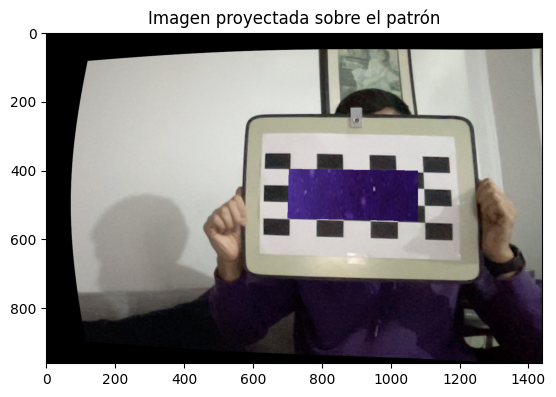

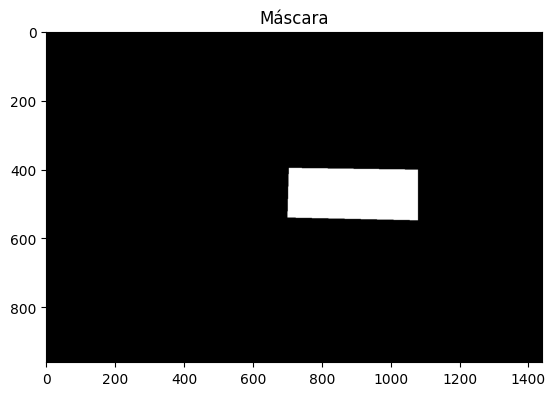

Advertencia: La relación de aspecto del área del patrón y la imagen difieren significativamente.
Error de reproyección: 1.0149483521421782e-13
La matriz de homografía parece ser adecuada.


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Función para proyectar una imagen sobre el patrón detectado
def project_image_on_pattern(src_image, corners, image_to_project):
    # Verificación del formato de la imagen a proyectar
    if image_to_project.shape[2] == 4:
        image_to_project = cv.cvtColor(image_to_project, cv.COLOR_BGRA2BGR)

    # Definir los puntos de origen (las 4 esquinas del patrón detectado)
    src_pts = np.array([corners[0], corners[5], corners[-1], corners[-6]], dtype=np.float32)

    # Definir los puntos de destino (las esquinas de la imagen a proyectar)
    h, w = image_to_project.shape[:2]
    dst_pts = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32)

    # Obtener la matriz de homografía
    M, _ = cv.findHomography(src_pts, dst_pts)

    # Aplicar warpPerspective para proyectar la imagen
    warped_image = cv.warpPerspective(image_to_project, M, (src_image.shape[1], src_image.shape[0]))

    # Crear una máscara de la imagen proyectada
    mask = np.zeros_like(src_image, dtype=np.uint8)
    cv.fillConvexPoly(mask, np.int32(src_pts.reshape(-1, 2)), (255,255,255))

    # Asegurarse de que la máscara y la imagen tengan las mismas dimensiones
    if mask.shape[:2] != src_image.shape[:2]:
        mask = cv.resize(mask, (src_image.shape[1], src_image.shape[0]))

    # Combinar las imágenes usando la máscara
    combined_image = cv.bitwise_and(src_image, 255-mask) + cv.bitwise_and(warped_image, mask)

    return combined_image, mask, M

# Función para validar dimensiones de la imagen
def validate_image_dimensions(pattern_area, image_to_project):
    # Calcular la relación de aspecto
    pattern_aspect_ratio = (pattern_area[1][0] - pattern_area[0][0]) / (pattern_area[2][1] - pattern_area[0][1])
    image_aspect_ratio = image_to_project.shape[1] / image_to_project.shape[0]

    # Comprobar si la relación de aspecto es similar (con un margen)
    if 0.9 <= pattern_aspect_ratio / image_aspect_ratio <= 1.1:
        print("La relación de aspecto es adecuada.")
    else:
        print("Advertencia: La relación de aspecto del área del patrón y la imagen difieren significativamente.")

# Función para validar la matriz de homografía
def validate_homography_matrix(M, src_pts, dst_pts):
    # Proyectar los puntos de origen a través de la matriz de homografía
    projected_pts = cv.perspectiveTransform(src_pts.reshape(-1, 1, 2), M)

    # Calcular el error de reproyección
    reprojection_error = np.sqrt(np.sum(np.square(projected_pts - dst_pts.reshape(-1, 1, 2)))) / 4
    print(f"Error de reproyección: {reprojection_error}")
    if reprojection_error < 1:  # Tolerancia de 1 pixel
        print("La matriz de homografía parece ser adecuada.")
    else:
        print("Advertencia: La matriz de homografía podría no ser precisa.")

# Carga la imagen que deseas proyectar
image_to_project = cv.imread("fotos/tunnel.jpeg")

# Por simplicidad, proyectaremos la imagen sobre la primera imagen donde se detectó el patrón
img = cv.imread(images[0])
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (6,4), None)

if ret == True:
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

    # Deshacer la distorsión de la imagen original
    img_undistorted = cv.undistort(img, mtx, dist, None, mtx)

    result_image, mask, M = project_image_on_pattern(img_undistorted, corners2.reshape(-1, 2), image_to_project)

    plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
    plt.title("Imagen proyectada sobre el patrón")
    plt.show()

    # Visualizar la máscara
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara")
    plt.show()

    # Validaciones
    validate_image_dimensions(corners2.reshape(-1, 2), image_to_project)
    validate_homography_matrix(M, np.array([corners2[0], corners2[5], corners2[-1], corners2[-6]]),
                               np.array([[0, 0], [image_to_project.shape[1]-1, 0], [image_to_project.shape[1]-1,
                                                                                    image_to_project.shape[0]-1],
                                                                                    [0, image_to_project.shape[0]-1]]))

<p>
    La proyección de imágenes en tiempo real es un campo de estudio avanzado en la visión por computadora que tiene aplicaciones en realidad aumentada, robótica, y más. El bloque de código a continuación está diseñado para demostrar esta capacidad mediante la superposición de una imagen digital sobre un patrón de ajedrez en tiempo real utilizando la cámara de una computadora.
</p>

<p>
    La función <code>activate_real_time_projection</code> es el núcleo de este proceso. A continuación se describen los pasos que sigue esta función:
</p>

<ul>
    <li>
        <strong>Carga de Imagen:</strong> Inicia leyendo la imagen que será proyectada sobre el patrón de ajedrez desde un archivo.
    </li>
    <li>
        <strong>Inicialización de la Cámara:</strong> Configura la cámara para la captura de video en vivo.
    </li>
    <li>
        <strong>Bucle de Proyección en Tiempo Real:</strong> Dentro de un bucle, la función captura cada fotograma de la cámara en tiempo real. Para cada fotograma, intenta encontrar el patrón de ajedrez.
    </li>
    <li>
        <strong>Detección y Proyección:</strong> Si detecta el patrón de ajedrez, calcula las coordenadas de las esquinas, corrige la distorsión del fotograma y proyecta la imagen sobre el patrón.
    </li>
    <li>
        <strong>Visualización:</strong> Muestra el resultado de la proyección en una ventana en tiempo real.
    </li>
    <li>
        <strong>Control de Tiempo y Salida:</strong> Permite al usuario finalizar la proyección presionando 'q' o después de un período predeterminado (30 segundos en este caso).
    </li>
    <li>
        <strong>Limpieza:</strong> Al finalizar, libera los recursos de la cámara y cierra todas las ventanas de OpenCV.
    </li>
</ul>

<p>
    Este código sirve como una demostración de cómo la visión por computadora puede interactuar con el mundo real en tiempo real, mostrando el potencial de estas tecnologías para aplicaciones interactivas e inmersivas.
</p>


In [ ]:
import cv2 as cv
import numpy as np
import time

# ... [Otras importaciones y funciones necesarias, como 'project_image_on_pattern']

def activate_real_time_projection(image_to_project_path):
    # Carga la imagen que deseas proyectar
    image_to_project = cv.imread(image_to_project_path)

    # Inicializa la captura de video
    cap = cv.VideoCapture(0)

    start_time = time.time()
    duration = 30  # segundos

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret, corners = cv.findChessboardCorners(gray, (6,4), None)
        if ret == True:
            corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
            frame_undistorted = cv.undistort(frame, mtx, dist, None, mtx)
            result_image, _, _ = project_image_on_pattern(frame_undistorted, corners2.reshape(-1, 2), image_to_project)
            cv.imshow('Real-time Projection', result_image)
        else:
            cv.imshow('Real-time Projection', frame)

        # Salir del bucle si se presiona la tecla 'q' o si se cumple el tiempo de duración
        if cv.waitKey(1) & 0xFF == ord('q') or (time.time() - start_time) > duration:
            break

    # Libera recursos
    cap.release()
    cv.destroyAllWindows()

# Para ejecutar la función
if __name__ == '__main__':
    activate_real_time_projection("fotos/tunnel.jpeg")

2023-11-01 22:15:51.141 python[1670:36493] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1.63 secs).


<div>
    <h3>Conclusión</h3>
    <p>
        La implementación de técnicas de visión por computadora, como la proyección de imágenes en tiempo real y la calibración de cámaras, demuestra la capacidad avanzada y el potencial de las aplicaciones interactivas y automatizadas en la actualidad. Este trabajo ha explorado los fundamentos y las aplicaciones prácticas de estos conceptos, utilizando herramientas y algoritmos de OpenCV para realizar tareas de calibración de cámaras y proyección de imágenes en superficies reales con corrección de perspectiva.
    </p>
    <p>
        A través de los experimentos y el código proporcionado, hemos visto cómo estos procesos no solo son cruciales en campos especializados como la robótica y la realidad aumentada, sino que también tienen implicaciones significativas en la industria y la investigación. La precisión y eficiencia en la calibración y proyección de imágenes son esenciales para el desarrollo de aplicaciones que requieren interacción en tiempo real con el mundo físico, abriendo nuevas posibilidades para la innovación tecnológica y el avance científico.
    </p>
    <p>
        Con los resultados obtenidos y el conocimiento compartido, se espera inspirar a más investigación y desarrollo en el campo de la visión por computadora, fomentando la creación de soluciones más inteligentes y adaptables que mejoren nuestra interacción con la tecnología en diversas áreas de nuestra vida.
    </p>
</div>
